In [52]:
import batman
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import scipy.optimize as spicy

def batmanCurveFit(xdata, t0, rp0):
    params = batman.TransitParams()
    params.t0 = t0                      #time of inferior conjunction
    params.per = 2.47061317              #orbital period
    params.rp = rp0                   #planet radius (in units of stellar radii)
    params.a = 7.903                     #semi-major axis (in units of stellar radii)
    params.inc = 83.872                  #orbital inclination (in degrees)
    params.ecc = 0.0                     #eccentricity
    params.w = 0.0                       #longitude of periastron (in degrees)
    params.u = [0.1, 0.3]                #limb darkening coefficients
    params.limb_dark = "quadratic"       #limb darkening model


    m = batman.TransitModel(params, xdata)
    flux = m.light_curve(params)
    return flux

#import necessary modules and define function for curve_fit to use

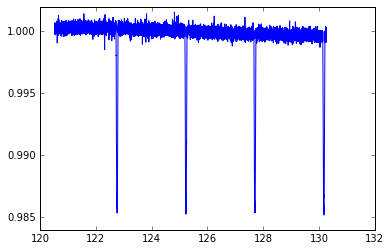

In [40]:
import astropy.io.ascii
table = astropy.io.ascii.read('kepler1b.txt')
time = table['time']
flux = table['flux']
nflux = flux/np.median(flux)
uncertainty = table['uncertainty']
plt.plot(time, nflux)

#import flux data, normalize the flux and plot
#note there are four transits, so check each transit, plot the transit cycles for each to see if transits are periodic

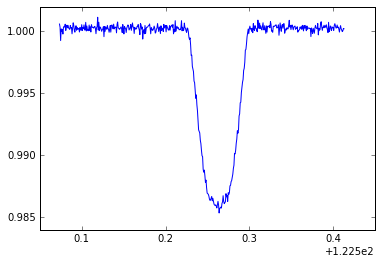

In [37]:
#First Transit
timepart1 = time[3000:3500]
fluxpart1 = nflux[3000:3500]
sigmapart1 = uncertainty[3000:3500]
plt.plot(timepart1, fluxpart1)

[  1.22763280e+02   1.18602996e-01]


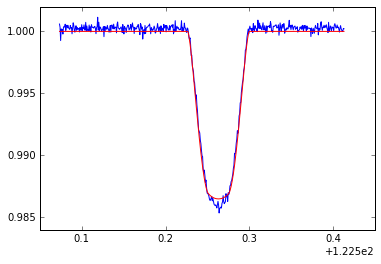

In [53]:
test1 = timepart1[np.argmin(fluxpart1)]

fitThis1 = spicy.curve_fit(batmanCurveFit, timepart1, fluxpart1, p0 = [test1, 1.0], sigma = sigmapart1)
xbest1, ybest1 = fitThis1[0]
print fitThis1[0]
plt.plot(timepart1, fluxpart1)
plt.plot(timepart1, batmanCurveFit(timepart1, xbest1, ybest1), color = 'red')

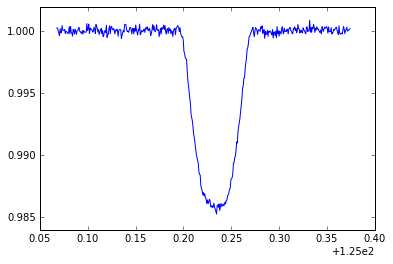

In [19]:
#Second Transit
timepart2 = time[6650:7100]
fluxpart2 = nflux[6650:7100]
sigmapart2 = uncertainty[6650:7100]
plt.plot(timepart2, fluxpart2)

[  1.25233934e+02   1.19760592e-01]


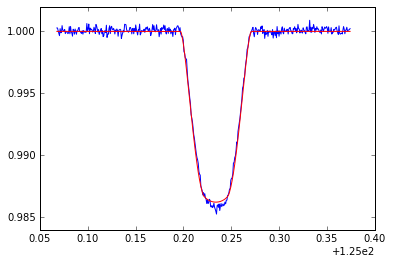

In [54]:
test2 = timepart2[np.argmin(fluxpart2)]

fitThis2 = spicy.curve_fit(batmanCurveFit, timepart2, fluxpart2, p0 = [test2, 1.0], sigma = sigmapart2)
xbest2, ybest2 = fitThis2[0]
print fitThis2[0]
plt.plot(timepart2, fluxpart2)
plt.plot(timepart2, batmanCurveFit(timepart2, xbest2, ybest2), color = 'red')

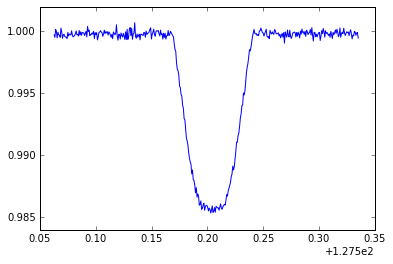

In [27]:
#Third Transit
timepart3 = time[10300:10700]
fluxpart3 = nflux[10300:10700]
sigmapart3 = uncertainty[10300:10700]
plt.plot(timepart3, fluxpart3)

[  1.27704545e+02   1.21095998e-01]


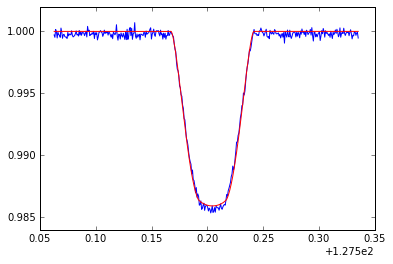

In [55]:
test3 = timepart3[np.argmin(fluxpart3)]

fitThis3 = spicy.curve_fit(batmanCurveFit, timepart3, fluxpart3, p0 = [test3, 1.0], sigma = sigmapart3)
xbest3, ybest3 = fitThis3[0]
print fitThis3[0]
plt.plot(timepart3, fluxpart3)
plt.plot(timepart3, batmanCurveFit(timepart3, xbest3, ybest3), color = 'red')

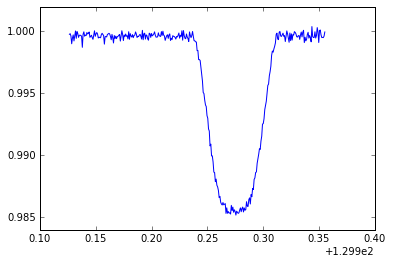

In [39]:
#Fourth Transit
timepart4 = time[13900:14700]
fluxpart4 = nflux[13900:14700]
sigmapart4 = uncertainty[13900:14700]
plt.plot(timepart4, fluxpart4)

[  1.30175180e+02   1.22095392e-01]


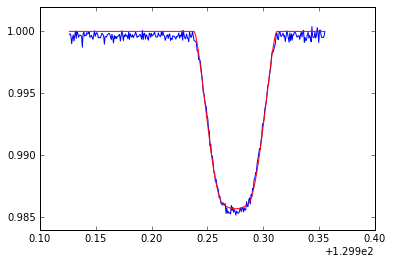

In [56]:
test4 = timepart4[np.argmin(fluxpart4)]

fitThis4 = spicy.curve_fit(batmanCurveFit, timepart4, fluxpart4, p0 = [test4, 1.0], sigma = sigmapart4)
xbest4, ybest4 = fitThis4[0]
print fitThis4[0]
plt.plot(timepart4, fluxpart4)
plt.plot(timepart4, batmanCurveFit(timepart4, xbest4, ybest4), color = 'red')

<Container object of 3 artists>

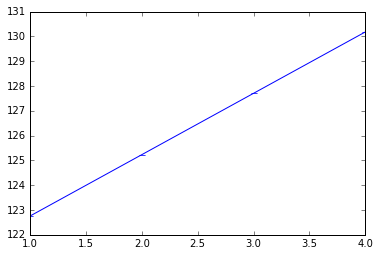

In [61]:
transitcycle = np.array([fitThis1[0][0], fitThis2[0][0], fitThis3[0][0], fitThis4[0][0]])
numberoftransit = np.array([1, 2, 3, 4])
error = np.array([fitThis1[1][0][0], fitThis2[1][0][0], fitThis3[1][0][0], fitThis4[1][0][0]])
plt.errorbar(numberoftransit, transitcycle, yerr = error)

#line of best fit goes through each point so transits are periodic and a curve_fit can be done including all transits

[  1.22763315e+02   1.20392568e-01]


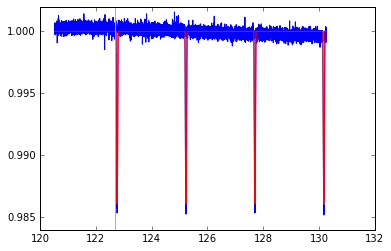

In [64]:
fitThis = spicy.curve_fit(batmanCurveFit, time, nflux, p0 = [test1, 1.0], sigma = uncertainty)
xbest, ybest = fitThis[0]
print fitThis[0]
plt.plot(time, nflux)
plt.plot(time, batmanCurveFit(time, xbest, ybest), color = 'red')
plt.axvline(122.7, color = 'orange')

In [63]:
fitThis

(array([  1.22763315e+02,   1.20392568e-01]),
 array([[  1.12612997e-09,  -2.88982286e-13],
        [ -2.88982286e-13,   8.98769182e-09]]))